# Model Building

In [49]:
X = df.drop(['Is Laundering'],axis = 1)
y = df['Is Laundering']

In [50]:
cat = ['From Bank','Account','To Bank','Receiving Currency','Payment Currency','Payment Format','Week']

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [54]:
ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

In [55]:
transformer = ColumnTransformer([('One Hot Encoding',ohe,cat)])

In [56]:
model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])

In [57]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Users\Jay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test.astype('int'),y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1521879
           1       0.95      0.06      0.12      1622

    accuracy                           1.00   1523501
   macro avg       0.98      0.53      0.56   1523501
weighted avg       1.00      1.00      1.00   1523501



In [60]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
rus = RandomUnderSampler()
X_s,y_s = rus.fit_resample(X,y.astype('int'))

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=0.3,random_state=42)
ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])
transformer = ColumnTransformer([('One Hot Encoding',ohe,cat)])
model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])
model.fit(X_train,y_train)
y_pred = model.predict(X_test).astype('object')
y_pred = model.predict(X_test)
print(classification_report(y_test.astype('int'),y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1586
           1       0.83      0.96      0.89      1521

    accuracy                           0.89      3107
   macro avg       0.89      0.89      0.89      3107
weighted avg       0.89      0.89      0.89      3107



c:\Users\Jay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Jay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


🔍 Found 2 numeric and 8 categorical columns

✅ Model Comparison Results (sorted by F1):


,model,accuracy,precision,recall,f1,roc_auc,cv_f1,type1_rate,type2_rate,confusion_matrix
0,GradientBoosting,0.9002,0.8555,0.9579,0.9038,0.9594,0.9074,0.1551,0.0421,"[[1340, 246], [64, 1457]]"
1,SVM,0.8896,0.8247,0.9836,0.8972,0.9117,0.9037,0.2005,0.0164,"[[1268, 318], [25, 1496]]"
2,XGBoost,0.8948,0.8667,0.9277,0.8962,0.9643,0.9081,0.1368,0.0723,"[[1369, 217], [110, 1411]]"
3,AdaBoost,0.8912,0.8548,0.9369,0.8940,0.9565,0.8921,0.1526,0.0631,"[[1344, 242], [96, 1425]]"
4,DecisionTree,0.8931,0.8709,0.9178,0.8937,0.8937,0.8960,0.1305,0.0822,"[[1379, 207], [125, 1396]]"
5,LogisticRegression,0.8857,0.8366,0.9527,0.8909,0.9470,0.8955,0.1784,0.0473,"[[1303, 283], [72, 1449]]"
6,RandomForest,0.8841,0.8857,0.8764,0.8810,0.9571,0.8873,0.1084,0.1236,"[[1414, 172], [188, 1333]]"
7,KNN,0.7831,0.7305,0.8823,0.7993,0.8761,0.8190,0.3121,0.1177,"[[1091, 495], [179, 1342]]"



🏆 Best Model: GradientBoosting (F1 = 0.9038)


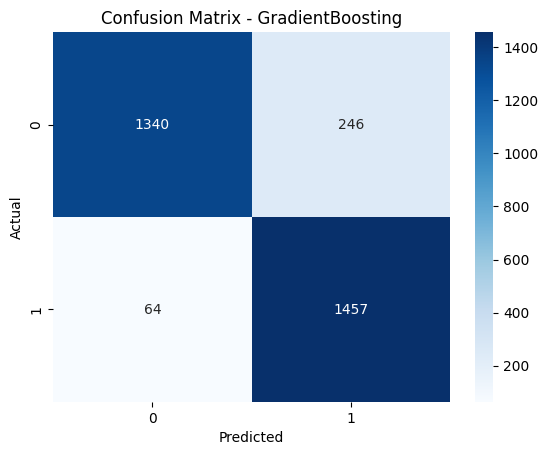


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.90      1586
           1       0.86      0.96      0.90      1521

    accuracy                           0.90      3107
   macro avg       0.90      0.90      0.90      3107
weighted avg       0.91      0.90      0.90      3107

Type I Error Rate (False Positive): 0.1551
Type II Error Rate (False Negative): 0.0421


In [64]:
# ============================================================
# 🚀 Unified Model Comparison (with Encoding & Error Handling)
# ============================================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Optional: include XGBoost/LightGBM if installed
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    has_xgb = False

try:
    from lightgbm import LGBMClassifier
    has_lgb = True
except ImportError:
    has_lgb = False

# -------------------------------------------------------------
# Identify numeric & categorical columns
# -------------------------------------------------------------
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"🔍 Found {len(num_cols)} numeric and {len(cat_cols)} categorical columns")

# Preprocessor to handle both numeric & categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

# -------------------------------------------------------------
# Define Models
# -------------------------------------------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

if has_xgb:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False, eval_metric="logloss",
        random_state=42, enable_categorical=False
    )

if has_lgb:
    models["LightGBM"] = LGBMClassifier(random_state=42)

# -------------------------------------------------------------
# Train, Evaluate & Compare
# -------------------------------------------------------------
results = []

for name, clf in models.items():
    try:
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", clf)
        ])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (np.nan,)*4
        type1_rate = FP / (FP + TN) if (FP + TN) > 0 else np.nan
        type2_rate = FN / (FN + TP) if (FN + TP) > 0 else np.nan

        cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring="f1").mean()

        results.append({
            "model": name,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "roc_auc": roc,
            "cv_f1": cv_f1,
            "type1_rate": type1_rate,
            "type2_rate": type2_rate,
            "confusion_matrix": cm
        })

    except Exception as e:
        print(f"❌ Model {name} failed: {e}")

# -------------------------------------------------------------
# Results Summary
# -------------------------------------------------------------
df_res = pd.DataFrame(results)
if df_res.empty:
    raise RuntimeError("All models failed — check if data preprocessing or target encoding is correct.")

df_res = df_res.sort_values(by="f1", ascending=False).reset_index(drop=True)
for c in ["accuracy","precision","recall","f1","roc_auc","cv_f1","type1_rate","type2_rate"]:
    df_res[c] = df_res[c].apply(lambda x: round(x, 4))

print("\n✅ Model Comparison Results (sorted by F1):")
display(df_res)

best_model_name = df_res.iloc[0]["model"]
print(f"\n🏆 Best Model: {best_model_name} (F1 = {df_res.iloc[0]['f1']})")

# -------------------------------------------------------------
# Confusion Matrix & Insights
# -------------------------------------------------------------
best_clf = models[best_model_name]
best_model = Pipeline([("preprocessor", preprocessor), ("classifier", best_clf)])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
TN, FP, FN, TP = cm.ravel()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print(f"Type I Error Rate (False Positive): {round(FP / (FP + TN), 4)}")
print(f"Type II Error Rate (False Negative): {round(FN / (FN + TP), 4)}")


Best model (from previous step): GradientBoosting

Confusion matrix at default threshold (0.5):
[[1340  246]
 [  64 1457]]

Classification report (default threshold):
       precision    recall        f1  accuracy
value   0.855549  0.957922  0.903846  0.900225


,threshold,precision,recall,f1,type1_rate,type2_rate,FP,FN
0,0.01,0.496896,1.000000,0.663902,0.970996,0.000000,1540,0
1,0.02,0.535563,1.000000,0.697546,0.831652,0.000000,1319,0
2,0.03,0.556124,1.000000,0.714756,0.765448,0.000000,1214,0
3,0.04,0.588850,1.000000,0.741228,0.669609,0.000000,1062,0
4,0.05,0.681309,0.999343,0.810235,0.448298,0.000657,711,1
5,0.06,0.730991,0.998685,0.844123,0.352459,0.001315,559,2
6,0.07,0.763078,0.997370,0.864634,0.296974,0.002630,471,4
7,0.08,0.775844,0.996713,0.872518,0.276166,0.003287,438,5


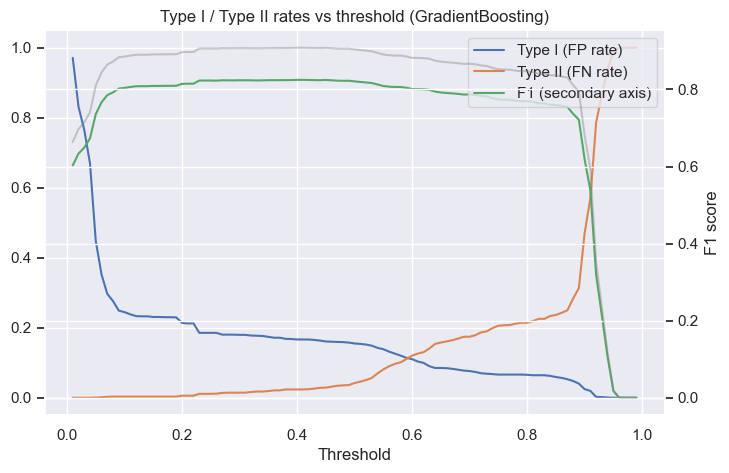


Recommended threshold (trade-off):


,threshold,precision,recall,f1,type1_rate,type2_rate,FP,FN
45,0.46,0.852924,0.968442,0.90702,0.160151,0.031558,254.0,48.0



Confusion matrix at recommended threshold:
[[1332  254]
 [  48 1473]]

Classification report (recommended threshold):
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1586
           1       0.85      0.97      0.91      1521

    accuracy                           0.90      3107
   macro avg       0.91      0.90      0.90      3107
weighted avg       0.91      0.90      0.90      3107


Short recommendation summary:
- Default threshold 0.5 FN count: 64
- Recommended threshold 0.460 FN count: 48, FP count: 254
- Use this threshold if minimizing missed laundering cases (Type II) is priority.
- If false alarms (Type I) are very costly operationally, raise the threshold to reduce FP rates; otherwise use recommended threshold to reduce FN.


In [65]:
# ===== Threshold tuning & short report (use best_model from previous cell) =====
import numpy as np
import pandas as pd
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             accuracy_score, roc_auc_score, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ensure best_model and best_model_name exist (from previous cell)
try:
    best_model_name, best_model
except NameError:
    # fallback: choose top model from df_res if available and reassign
    if 'df_res' in globals() and not df_res.empty:
        best_model_name = df_res.iloc[0]['model']
        best_model = models[best_model_name]
    else:
        raise RuntimeError("best_model not found. Run the model comparison cell first.")

# Predict probabilities or scores for positive class
if hasattr(best_model, "predict_proba"):
    y_scores = best_model.predict_proba(X_test)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_scores = best_model.decision_function(X_test)
else:
    # fallback to binary predictions (no threshold tuning possible)
    y_scores = None

print(f"Best model (from previous step): {best_model_name}")

# Baseline metrics at default threshold 0.5 (or fallback predict)
if y_scores is not None:
    y_pred_default = (y_scores >= 0.5).astype(int)
else:
    y_pred_default = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_default)
print("\nConfusion matrix at default threshold (0.5):")
print(cm)
print("\nClassification report (default threshold):")
print(pd.DataFrame.from_dict(
    {"precision": [precision_score(y_test,y_pred_default,zero_division=0)],
     "recall":    [recall_score(y_test,y_pred_default,zero_division=0)],
     "f1":        [f1_score(y_test,y_pred_default,zero_division=0)],
     "accuracy":  [accuracy_score(y_test,y_pred_default)]},
    orient="index", columns=["value"]).T)

# If we have continuous scores, sweep thresholds
if y_scores is not None:
    thresholds = np.linspace(0.01, 0.99, 99)
    records = []
    for t in thresholds:
        yp = (y_scores >= t).astype(int)
        TN, FP, FN, TP = confusion_matrix(y_test, yp).ravel()
        type1_rate = FP / (FP + TN) if (FP + TN) > 0 else np.nan
        type2_rate = FN / (FN + TP) if (FN + TP) > 0 else np.nan
        rec = recall_score(y_test, yp, zero_division=0)
        prec = precision_score(y_test, yp, zero_division=0)
        f1 = f1_score(y_test, yp, zero_division=0)
        records.append({"threshold": t, "precision": prec, "recall": rec, "f1": f1,
                        "type1_rate": type1_rate, "type2_rate": type2_rate,
                        "FP": FP, "FN": FN})

    df_thresh = pd.DataFrame(records)
    # show top thresholds by recall (lowest Type II)
    display(df_thresh.sort_values(by="recall", ascending=False).head(8))

    # Plot Type I vs Type II vs Threshold
    plt.figure(figsize=(8,5))
    plt.plot(df_thresh["threshold"], df_thresh["type1_rate"], label="Type I (FP rate)")
    plt.plot(df_thresh["threshold"], df_thresh["type2_rate"], label="Type II (FN rate)")
    plt.plot(df_thresh["threshold"], df_thresh["f1"], label="F1 (secondary axis)")
    plt.xlabel("Threshold")
    plt.title(f"Type I / Type II rates vs threshold ({best_model_name})")
    plt.legend(loc="upper right")
    ax2 = plt.twinx()
    ax2.plot(df_thresh["threshold"], df_thresh["f1"], color="gray", alpha=0.4)
    ax2.set_ylabel("F1 score")
    plt.show()

    # Choose recommended threshold:
    # Strategy: minimize Type II (FN rate) while keeping Type I below some bound.
    # We'll propose a threshold that yields FN_rate <= baseline_FN_rate * 0.8 while Type I not excessive.
    baseline_FN = df_thresh.loc[(df_thresh.threshold - 0.5).abs().idxmin(), "FN"]
    # recommend threshold with FN <= 0.8*baseline_FN and minimal FP among those
    candidates = df_thresh[df_thresh["FN"] <= 0.8 * baseline_FN]
    if len(candidates):
        recommended = candidates.sort_values(by="FP").iloc[0]
    else:
        recommended = df_thresh.sort_values(by="FN").iloc[0]  # best we can do

    print("\nRecommended threshold (trade-off):")
    display(recommended.to_frame().T)

    # Show confusion matrix at recommended threshold
    t = recommended.threshold
    yp_rec = (y_scores >= t).astype(int)
    cm_rec = confusion_matrix(y_test, yp_rec)
    print("\nConfusion matrix at recommended threshold:")
    print(cm_rec)
    print("\nClassification report (recommended threshold):")
    from sklearn.metrics import classification_report
    print(classification_report(y_test, yp_rec, zero_division=0))

    print("\nShort recommendation summary:")
    print(f"- Default threshold 0.5 FN count: {int(baseline_FN)}")
    print(f"- Recommended threshold {t:.3f} FN count: {int(recommended.FN)}, FP count: {int(recommended.FP)}")
    print("- Use this threshold if minimizing missed laundering cases (Type II) is priority.")
    print("- If false alarms (Type I) are very costly operationally, raise the threshold to reduce FP rates; otherwise use recommended threshold to reduce FN.")

else:
    print("\nModel does not provide continuous scores; threshold tuning not possible. Consider using a probabilistic classifier or calibrating the classifier.")


🏆 Top 3 candidate models: ['GradientBoosting', 'SVM', 'XGBoost']

🔍 Running RandomizedSearchCV on GradientBoosting ...
Fitting 4 folds for each of 25 candidates, totalling 100 fits
✅ Best params for GradientBoosting: {'clf__n_estimators': 400, 'clf__max_depth': 3, 'clf__learning_rate': 0.1}

📊 Classification Report for GradientBoosting (Tuned):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1586
           1       0.86      0.96      0.90      1521

    accuracy                           0.90      3107
   macro avg       0.90      0.90      0.90      3107
weighted avg       0.91      0.90      0.90      3107



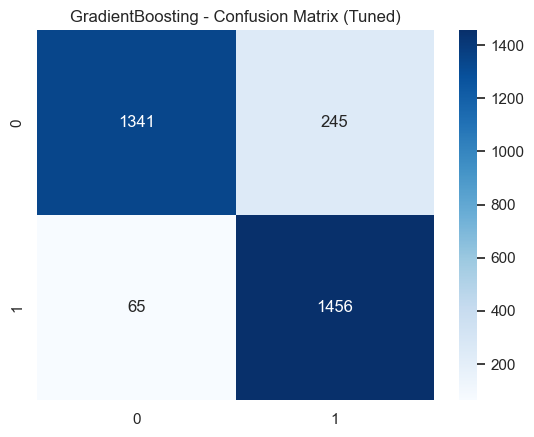


🔍 Running RandomizedSearchCV on SVM ...
Fitting 4 folds for each of 6 candidates, totalling 24 fits
✅ Best params for SVM: {'clf__kernel': 'linear', 'clf__C': 0.1}

📊 Classification Report for SVM (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1586
           1       0.82      0.99      0.90      1521

    accuracy                           0.89      3107
   macro avg       0.90      0.89      0.89      3107
weighted avg       0.91      0.89      0.89      3107



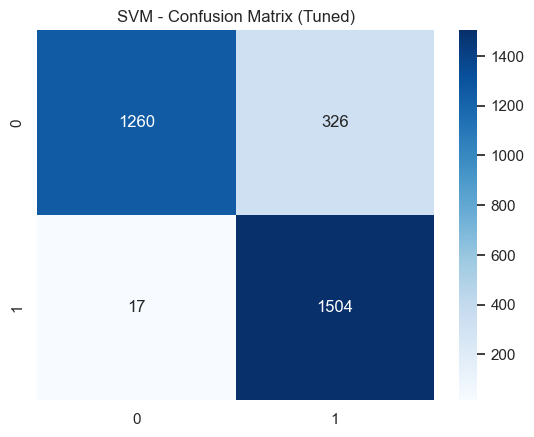


🔍 Running RandomizedSearchCV on XGBoost ...
Fitting 4 folds for each of 25 candidates, totalling 100 fits
✅ Best params for XGBoost: {'clf__n_estimators': 400, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}

📊 Classification Report for XGBoost (Tuned):
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      1586
           1       0.86      0.95      0.90      1521

    accuracy                           0.90      3107
   macro avg       0.90      0.90      0.90      3107
weighted avg       0.90      0.90      0.90      3107



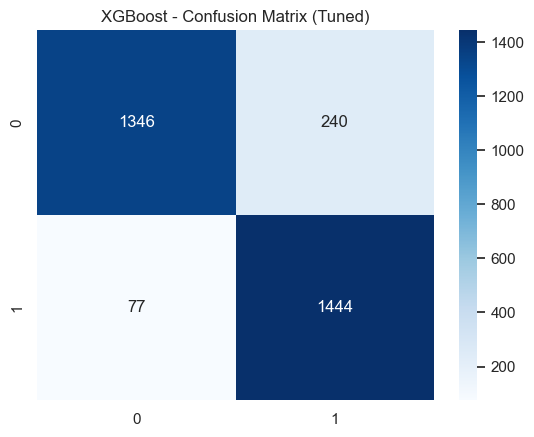

,model,precision,recall,f1
0,GradientBoosting,0.855967,0.957265,0.903786
1,XGBoost,0.857482,0.949375,0.901092
2,SVM,0.821858,0.988823,0.897642



🏁 Recommended: Choose the model with the highest F1 score.


In [66]:
# ==============================================
# ✅ CLEAN & FIXED HYPERPARAMETER TUNING BLOCK
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

sns.set(style="whitegrid")

# Make sure you already have 'df_res' from previous cell
if 'df_res' not in globals() or df_res.empty:
    raise RuntimeError("❌ 'df_res' not found. Run the model comparison cell first.")

# --- Pick top 3 models ---
top_models = df_res['model'].tolist()[:3]
print("🏆 Top 3 candidate models:", top_models)

# --- Define hyperparameter grids ---
param_grids = {
    "LogisticRegression": {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs"]
    },
    "DecisionTree": {
        "clf__max_depth": [None, 5, 10, 20, 40],
        "clf__min_samples_leaf": [1, 2, 5, 10],
        "clf__criterion": ["gini", "entropy"]
    },
    "RandomForest": {
        "clf__n_estimators": [100, 200, 400],
        "clf__max_depth": [None, 10, 20, 40],
        "clf__min_samples_leaf": [1, 2, 5]
    },
    "GradientBoosting": {
        "clf__n_estimators": [100, 200, 400],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [3, 5, 8]
    },
    "AdaBoost": {
        "clf__n_estimators": [50, 100, 200],
        "clf__learning_rate": [0.01, 0.1, 1.0]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["rbf", "linear"]
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7, 11],
        "clf__weights": ["uniform", "distance"]
    },
    "XGBoost": {
        "clf__n_estimators": [100, 200, 400],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [3, 5, 8]
    },
    "LightGBM": {
        "clf__n_estimators": [100, 200, 400],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__num_leaves": [31, 50, 100]
    }
}

# --- Run tuning ---
best_estimators = {}
summary = []

for model_name in top_models:
    if model_name not in models:
        print(f"⚠️ Model {model_name} not found in models dict; skipping.")
        continue

    # Create pipeline including preprocessing
    estimator = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", models[model_name])
    ])

    grid = param_grids.get(model_name, {})
    if not grid:
        print(f"⚠️ No grid defined for {model_name}, using default model.")
        best_estimators[model_name] = estimator.fit(X_train, y_train)
        continue

    print(f"\n🔍 Running RandomizedSearchCV on {model_name} ...")
    rnd = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=grid,
        n_iter=25,
        scoring="f1",
        cv=4,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    rnd.fit(X_train, y_train)

    print(f"✅ Best params for {model_name}: {rnd.best_params_}")
    best = rnd.best_estimator_
    best_estimators[model_name] = best

    # --- Evaluate on test set ---
    y_pred = best.predict(X_test)
    print(f"\n📊 Classification Report for {model_name} (Tuned):")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix (Tuned)")
    plt.show()

    # --- Collect performance ---
    summary.append({
        "model": model_name,
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0)
    })

# --- Final Summary ---
summary_df = pd.DataFrame(summary).sort_values(by="f1", ascending=False).reset_index(drop=True)
display(summary_df)
print("\n🏁 Recommended: Choose the model with the highest F1 score.")


[codecarbon INFO @ 23:37:33] Energy consumed for RAM : 0.008979 kWh. RAM Power : 20.0 W
[codecarbon INFO @ 23:37:33] Delta energy consumed for CPU with constant : 0.000173 kWh, power : 42.5 W
[codecarbon INFO @ 23:37:33] Energy consumed for All CPU : 0.019091 kWh
[codecarbon INFO @ 23:37:33] Energy consumed for all GPUs : 0.001743 kWh. Total GPU Power : 3.894564976154055 W
[codecarbon INFO @ 23:37:33] 0.029813 kWh of electricity and 0.000000 L of water were used since the beginning.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[codecarbon WARNING @ 23:37:34] Multiple instances of codecarbon are allowed to run at the same time.


🏆 Top 3 Models for Emission Tracking: ['GradientBoosting', 'SVM', 'XGBoost']

⚡ Measuring emissions for GradientBoosting ...

⚡ Measuring emissions for SVM ...

⚡ Measuring emissions for XGBoost ...

🌱 Carbon Emission Report (Higher Sampling Precision - Lower = Greener):


,Model,CO2_kg,Training_time_sec
0,GradientBoosting,0.000180,3.146
2,XGBoost,0.000186,3.226
1,SVM,0.001525,27.746



🌍 Total CO₂ emitted by top 3 models: 0.0018902844 kg
♻️ Most Eco-Friendly Model: GradientBoosting


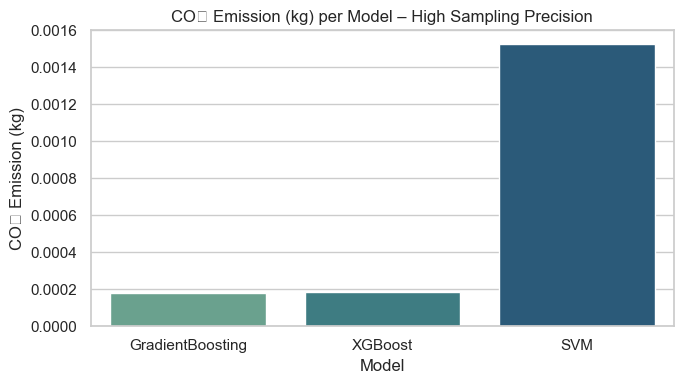

In [70]:
# ============================================================
# 🌍 Carbon Emission Tracking (Compatible + High Precision)
# ============================================================
!pip install codecarbon -q

from codecarbon import EmissionsTracker
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# --- Top 3 models from df_res ---
top_models = df_res['model'].tolist()[:3]
print("🏆 Top 3 Models for Emission Tracking:", top_models)

emission_results = []

for name in top_models:
    print(f"\n⚡ Measuring emissions for {name} ...")
    
    # Wrap the model inside preprocessing pipeline
    mdl = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", models[name])
    ])
    
    # Tracker: higher sampling frequency for better accuracy
    tracker = EmissionsTracker(
        project_name=f"{name}_carbon",
        measure_power_secs=0.1,   # finer sampling
        log_level="error"
    )
    
    tracker.start()
    mdl.fit(X_train, y_train)
    tracker.stop()
    
    emissions = tracker.final_emissions_data.emissions
    duration = tracker.final_emissions_data.duration
    emission_results.append({
        "Model": name,
        "CO2_kg": float(f"{emissions:.10f}"),
        "Training_time_sec": round(duration, 3)
    })

# --- Create results table ---
emission_df = pd.DataFrame(emission_results).sort_values(by="CO2_kg")
print("\n🌱 Carbon Emission Report (Higher Sampling Precision - Lower = Greener):")
display(emission_df)

# --- Summary ---
total_emission = emission_df["CO2_kg"].sum()
eco_best = emission_df.iloc[0]["Model"]

print(f"\n🌍 Total CO₂ emitted by top 3 models: {total_emission:.10f} kg")
print(f"♻️ Most Eco-Friendly Model: {eco_best}")

# --- Visualization ---
plt.figure(figsize=(7, 4))
sns.barplot(data=emission_df, x="Model", y="CO2_kg", palette="crest")
plt.title("CO₂ Emission (kg) per Model – High Sampling Precision")
plt.ylabel("CO₂ Emission (kg)")
plt.xlabel("Model")
plt.tight_layout()
plt.show()
